<a href="https://colab.research.google.com/github/gogosean/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


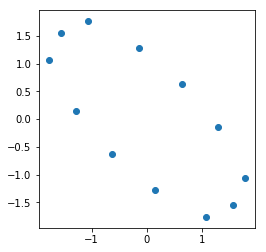

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x1 = [-2.2,-2,-2,-1,-1,0,0,1,1,2,2,2.2]
y1 = [0,.5,-.5,.8,-.8,.9,-.9,.8,-.8,.5,-.5,0]

data = {"x": x1, "y": y1}

df1 = pd.DataFrame(data)

df1["x_rotate"] = df1.apply(lambda x: (x.x+x.y)/math.sqrt(2), axis=1)
df1["y_rotate"] = df1.apply(lambda x: (x.y-x.x)/math.sqrt(2), axis=1)

axes = plt.gca()
plt.axes().set_aspect('equal')
plt.scatter(df1['x_rotate'], df1['y_rotate'])

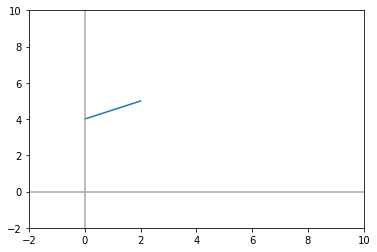

In [4]:


g = np.asarray([0,2])
h = np.asarray([4,5])

x = g
y = h

plt.figure()
plt.plot(x, y)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

they return more than one y output given a single x input

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

In [0]:
relation 1 is not a function because there is more than one y output for an x. Relation2 lines do not cross more than once. Relation 3 same as relation 1. Relation 4 same as relation 1. Relation 5 same as relation 1

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

1. input = 3 output =2. 2. Input = 4 output =2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

In [0]:
𝑓(𝑥+𝑦)=(𝑥+𝑦,𝑥+𝑦)=(𝑥,𝑥)+(𝑦,𝑦)=𝑓(𝑥)+𝑓(𝑦)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
#hand
#x = [1,2]
#[1,3]
#[-1,2]
#7, 3
#x=[1,2,3]
# 4,1,2
# -1,2,3
#  5,1,-2
#
#12 ,12, 1  

#data = {"x": x1, "y": y1}

#df1 = pd.DataFrame(data)

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Wehn we reduce data, there are some data points that will not change.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

more columns than rows, computationally intense, redundant information

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

In [0]:
rows are 5 * the predictors

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
df= pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

In [18]:
df.head(5)

#df.reset_index()
#df.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df.columns


features= list(df.columns.values)

print(features)


['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [0]:
from sklearn.preprocessing import StandardScaler
features.remove('species')
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)

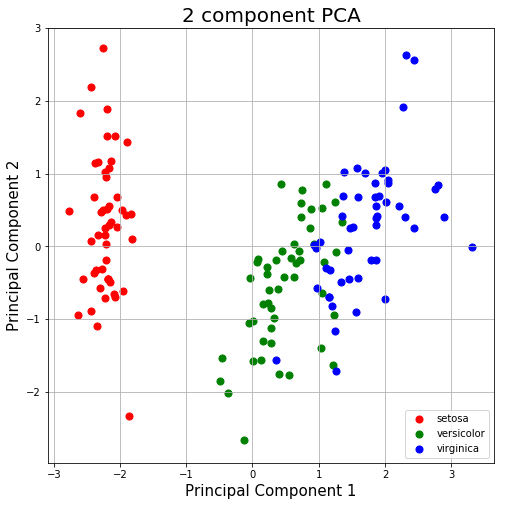

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)